- 세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 holdout 데이터에서 모델의 성능이 몇 번의 epochs 후에 최고치에 다다랐다가 감소되기 시작했다.

- 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작한다. 과대적합은 모든 머신 러닝 문제에서 발생한다. 머신 러닝을 마스터하려면 과대적합을 다루는 방법을 꼭 배워야 한다.

- 머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기이다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정(머신 러닝의 학습)이다.

- 반면 일반화는 훈련된 모델이 이전에 본 적이 없는 데이터에서 얼마나 잘 수행되는지를 의미한다. 물론 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것이다. 하지만 일반화 성능을 제어할 방법이 없다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있다.

# 과대적합 해결

- 더 많은 훈련 데이터 수집
- 정보의 양을 조절하거나 저장할 수 있는 정보에 제약
- 파리미터 수가 적은 모델 선택(단순한 모델)
- 훈련 데이터의 특성 수 축소
- 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록 함)
- 훈련데이터의 잡음을 줄인다(오류데이터 수정하고 이상치 제거)

#과소적합 해결

- 더 복잡한 모델 선택
- 훈련데이터의 특성을 더 선택
- 모델의 제약을 줄인다.

- 훈련 초기에 최적화와 일반화는 상호 연관되어 있다. 훈련 데이터의 손실이 낮을수록 테스트 데이터의 손실이 낮다. 이러 상황이 발생할 때 모델이 과소적합되었다고 말한다. 모델의 성능이 계속 발전될 여지가 있다. 즉, 네트워크가 훈련 데이터에 있는 관련 특성을 모두 학습하지 못했다.


- 하지만 훈련 데이터에 여러 번 반복 학습하고 나면 어느 시점부터 일반화 성능이 더이상 높아지지 않는다. 검증 세트의 성능이 멈추고 감소되기 시작한다. 즉, 모델이 과대적합되기 시작한다. 이는 훈련 데이터에 특화된 패턴을 학습하기 시작했다는 의미이다. 이 패턴은 새로운 데이터와 관련성이 적어 잘못된 판단을 하게 만든다.

- 모델이 관련성이 없고 좋지 못한 패턴을 훈련 데이터에서 학습하지 못하도록 하는 가장 좋은 방법은 더 많은 훈련 데이터를 모으는 것이다.
더 많은 데이터에서 훈련된 모델은 자연스럽게 일반화 성능이 더 뛰어나기 때문이다.

- 데이터를 더 모으는 것이 불가능할 경우에는 모델이 수용할 수 있는 정보의 양을 조절하거나 저장할 수 있는 정보에 제약을 가하는 방법이 있다.

- 네트워크가 적은 수의 패턴만을 기억할 수 있다면 최적화 과정에서 가장 중요한 패턴에 집중하게 될 것이다. 이런 패턴은 더 나은 일반화 성능을 제공할 수 있다.

- 이런식으로 과대적합을 피하는 처리 과정을 규제(regulation)이라고 한다. 

In [1]:
# num_words=10000은 훈련 데이터에서 가장 자주 나타나는 단어 10000개만 사용한다는 의미
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension =10000):
  results = np.zeros((len(sequences), dimension)) # 2차원 행렬
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만든다.
  return results

# 훈련 데이터를 벡터로 변환한다
x_train = vectorize_sequences(train_data)

# 테스트 데이터를 벡터로 변환한다
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 변환한다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
# 신경망 모델 만들기
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# 모델 컴파일
model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [6]:
# 훈련 검증
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.5035 - accuracy: 0.7869 - val_loss: 0.3672 - val_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2891 - accuracy: 0.9065 - val_loss: 0.2989 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2178 - accuracy: 0.9274 - val_loss: 0.2743 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1661 - accuracy: 0.9478 - val_loss: 0.2806 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1331 - accuracy: 0.9586 - val_loss: 0.3016 - val_accuracy: 0.8779
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1091 - accuracy: 0.9650 - val_loss: 0.3070 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0907 - accuracy: 0.9726 - val_loss: 0.3218 - val_accuracy: 0.8833
Epoch 8/20
30

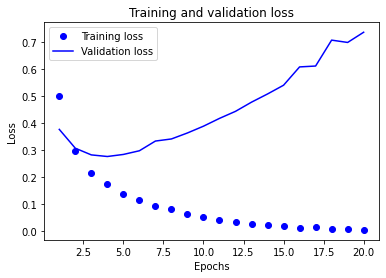

In [ ]:
# 시각화
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

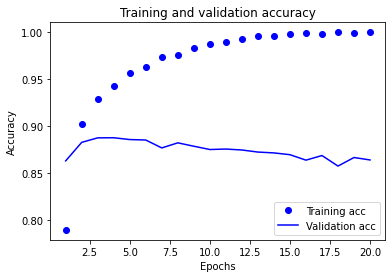

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[과제] 상기 사례에 대하여 아래 사항을 수행하세요.

- 더 작은 네트워크로 변경해 그 효과를 설명 (출력 유닛 수 6)
- 더 큰 네트워크로 변경해 그 효과를 설명 (출력 유닛 수 1024)
- l2 규제를 추가하여 그 효과를 설명

#더 작은 네트워크로 변경

In [8]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [9]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 53ms/step - loss: 0.5831 - acc: 0.7693 - val_loss: 0.5036 - val_acc: 0.8423
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.4171 - acc: 0.8872 - val_loss: 0.3890 - val_acc: 0.8747
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3092 - acc: 0.9114 - val_loss: 0.3234 - val_acc: 0.8879
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2460 - acc: 0.9252 - val_loss: 0.2945 - val_acc: 0.8903
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2071 - acc: 0.9336 - val_loss: 0.2839 - val_acc: 0.8892
Epoch 6/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1818 - acc: 0.9401 - val_loss: 0.2848 - val_acc: 0.8868
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1641 - acc: 0.9461 - val_loss: 0.2882 - val_acc: 0.8858
Epoch 8/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1488 - a

In [11]:
epochs = range(1, 21)
original_val_loss = history.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

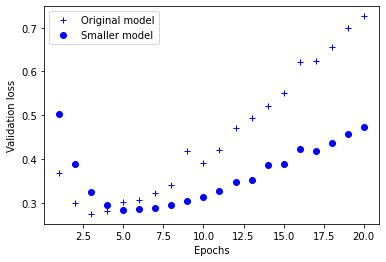

In [12]:
import matplotlib.pyplot as plt

# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 작은 네트워크가 기본 네트워크보다 더 나중에 과대적합(네 번째 에포크가 아니라 여섯 번째 에포크에서)되기 시작한다.
- 과대적합이 시작되었을 때 성능이 더 천천히 감소되었다.

#문제에 필요한 것보다 훨씬 더 많은 용량을 가진 네트워크와 비교

In [ ]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 34s 690ms/step - loss: 0.5297 - acc: 0.7790 - val_loss: 0.3017 - val_acc: 0.8778
Epoch 2/20
49/49 [==============================] - 33s 669ms/step - loss: 0.2255 - acc: 0.9104 - val_loss: 0.3199 - val_acc: 0.8613
Epoch 3/20
49/49 [==============================] - 33s 670ms/step - loss: 0.1252 - acc: 0.9568 - val_loss: 0.3325 - val_acc: 0.8847
Epoch 4/20
49/49 [==============================] - 32s 665ms/step - loss: 0.0756 - acc: 0.9831 - val_loss: 0.4600 - val_acc: 0.8801
Epoch 5/20
49/49 [==============================] - 33s 669ms/step - loss: 0.0723 - acc: 0.9870 - val_loss: 0.4726 - val_acc: 0.8832
Epoch 6/20
49/49 [==============================] - 33s 667ms/step - loss: 7.8575e-04 - acc: 1.0000 - val_loss: 0.6699 - val_acc: 0.8830
Epoch 7/20
49/49 [==============================] - 33s 669ms/step - loss: 8.0479e-05 - acc: 1.0000 - val_loss: 0.8327 - val_acc: 0.8820
Epoch 8/20
49/49 [==============================] - 33s 667ms

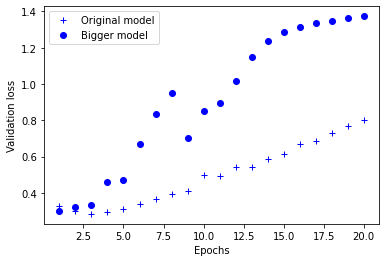

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

- 용량이 큰 네트워크는 첫 번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해진다. 검증 손실도 매우 불안정하다.
- 다음은 두 네트워크의 훈련 손실이다.

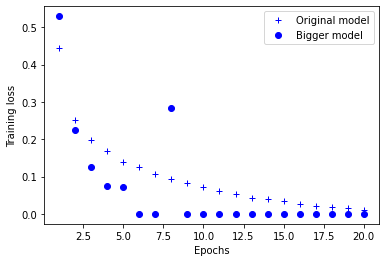

In [ ]:
# 훈련 손실
original_train_loss = hiistory.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

- 여기서 볼 수 있듯이 용량이 큰 네트워크는 훈련 손실이 매우 빠르게 0에 가까워진다. 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링(결국 훈련 손실이 낮아진다)할 수 있다. 
- 하지만 더욱 과대적합에 민감(결국 훈련과 검증 손실 사이에 큰 차이가 발생)해진다.

#가중치 규제 추가

- 간단한 모델이 복잡한 모델보다 덜 과대적합될 가능성이 높다.
- 간단한 모델은 파라미터 값 분포의 엔트로피가 작은 모델이다.
- 그러므로 과대적합을 완화시키기 위한 일반적인 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것이다.
  - 이렇게 하면 가중치 값의 분포가 더 균일하게 된다. 이를 가중치 규제라 하고 네트워크 손실 함수에 큰 가중치에 연관된 비용을 추가한다.
- L1 규제 : 가중치의 절대값에 비례하는 비용이 추가된다(가중치의 L1노름). 
- L2 규제 : 가중치의 제곱에 비례하는 비용이 추가된다(가중치의 L2노름).
  - L2 규제는 신경망에서 가중치 감쇠라고도 한다.

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer= regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

- l2(0.001)는 가중치 행렬의 모든 원소를 제곱하고 0.001을 곱하여 네트워크의 전체 손실에 더해진다는 의미이다. 
- 이 페널티 항은 훈련할 때만 추가된다. 
- 이 네트워크의 손실은 테스트보다 훈련할 때 더 높을 것이다.

In [15]:
# L2 규제 패널티의 효과
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 58ms/step - loss: 0.4804 - acc: 0.8307 - val_loss: 0.3796 - val_acc: 0.8790
Epoch 2/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3099 - acc: 0.9091 - val_loss: 0.3646 - val_acc: 0.8708
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2674 - acc: 0.9214 - val_loss: 0.3345 - val_acc: 0.8858
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2499 - acc: 0.9288 - val_loss: 0.3640 - val_acc: 0.8732
Epoch 5/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2381 - acc: 0.9317 - val_loss: 0.3644 - val_acc: 0.8747
Epoch 6/20
49/49 [==============================] - 3s 66ms/step - loss: 0.2301 - acc: 0.9372 - val_loss: 0.3832 - val_acc: 0.8689
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2248 - acc: 0.9391 - val_loss: 0.3606 - val_acc: 0.8785
Epoch 8/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2185 - a

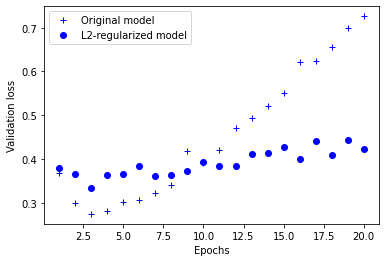

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

여기서 볼 수 있듯이 두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델(점)이 기본 모델(덧셈 기호)보다 훨씬 더 과대적합에 잘 견디고 있다.

L1(0.0001) 모델과 비교

In [17]:
from keras.models import Model

# 모델 생성
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

# compile
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 58ms/step - loss: 0.5601 - acc: 0.8153 - val_loss: 0.4237 - val_acc: 0.8810
Epoch 2/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3705 - acc: 0.8948 - val_loss: 0.3687 - val_acc: 0.8891
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3324 - acc: 0.9055 - val_loss: 0.3609 - val_acc: 0.8869
Epoch 4/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3134 - acc: 0.9112 - val_loss: 0.3568 - val_acc: 0.8874
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3010 - acc: 0.9171 - val_loss: 0.3611 - val_acc: 0.8859
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2965 - acc: 0.9171 - val_loss: 0.4081 - val_acc: 0.8680
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2873 - acc: 0.9222 - val_loss: 0.3933 - val_acc: 0.8740
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2816 - a

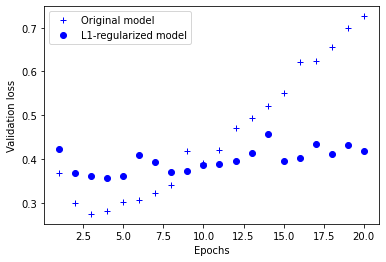

In [18]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [19]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [21]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 79ms/step - loss: 0.5615 - acc: 0.8236 - val_loss: 0.4515 - val_acc: 0.8598
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3795 - acc: 0.8937 - val_loss: 0.3754 - val_acc: 0.8888
Epoch 3/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3398 - acc: 0.9050 - val_loss: 0.3751 - val_acc: 0.8842
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3239 - acc: 0.9089 - val_loss: 0.3656 - val_acc: 0.8861
Epoch 5/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3132 - acc: 0.9132 - val_loss: 0.3811 - val_acc: 0.8795
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3072 - acc: 0.9152 - val_loss: 0.3676 - val_acc: 0.8851
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3009 - acc: 0.9201 - val_loss: 0.3698 - val_acc: 0.8853
Epoch 8/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2950 - a

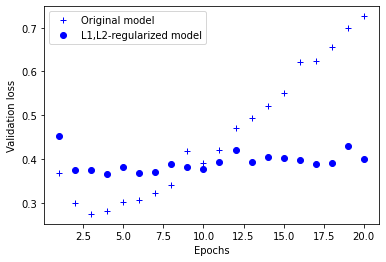

In [22]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#드롭아웃

- 신경망을 위해 사용되는 규제 기법 중에서 가장 효과적이고 널리 사용되는 방법 중에 하나이다.
- 네트워크의 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킨다(0으로 만든다).

In [23]:
from tensorflow.keras import models, layers

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [24]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 87ms/step - loss: 0.5882 - acc: 0.6840 - val_loss: 0.4418 - val_acc: 0.8633
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.4373 - acc: 0.8147 - val_loss: 0.3379 - val_acc: 0.8794
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3483 - acc: 0.8664 - val_loss: 0.2846 - val_acc: 0.8900
Epoch 4/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2947 - acc: 0.8916 - val_loss: 0.2742 - val_acc: 0.8910
Epoch 5/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2564 - acc: 0.9086 - val_loss: 0.2769 - val_acc: 0.8897
Epoch 6/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2283 - acc: 0.9217 - val_loss: 0.2904 - val_acc: 0.8881
Epoch 7/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2061 - acc: 0.9318 - val_loss: 0.3058 - val_acc: 0.8872
Epoch 8/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1866 - a

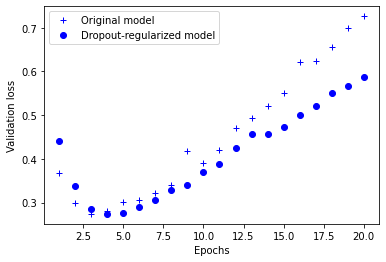

In [25]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()